## SQL Views Import

In [2]:
import pyodbc
import pandas as pd

# Conection parameters
server = 'localhost\\SQLEXPRESS'  # or 'localhost' if named instance isn't used
database = 'Student_Performance'
driver = 'ODBC Driver 17 for SQL Server'

# create ODBC conection
conn = pyodbc.connect(f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;')

# run query and create dataframe with result
df = pd.read_sql('SELECT * FROM vw_StudentPerformance_Base', conn)

# preview
df.head()

C:\Users\Eros\AppData\Local\Temp\ipykernel_17048\3627663454.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM vw_StudentPerformance_Base', conn)


,Hours_Studied,Study_Bracket,Previous_Scores,Prev_Score_Bracket,Extracurricular_Activities,Extracurricular_Label,Sleep_Hours,Sleep_Bracket,Sample_Question_Papers_Practiced,Performance_Index,Performance_Level
0,7,5h+,99,85+,True,Yes,9,8h+,1,91.0,High
1,4,3–5h,82,70–84,False,No,4,4–6h,2,65.0,Medium
2,8,5h+,51,50–69,True,Yes,7,6–8h,2,45.0,Low
3,5,5h+,52,50–69,True,Yes,5,4–6h,2,36.0,Low
4,7,5h+,75,70–84,False,No,8,8h+,5,66.0,Medium


## Exploratory Data Analysis (EDA)

#### Basic Structure

In [3]:
# nº rows/columns
print(f"Shape: {df.shape}")

# data types and nulls
print("\nInfo:")
df.info()

# basic numeric statistics
print("\nDescription:")
df.describe()

Shape: (10000, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours_Studied                     10000 non-null  int64  
 1   Study_Bracket                     10000 non-null  object 
 2   Previous_Scores                   10000 non-null  int64  
 3   Prev_Score_Bracket                10000 non-null  object 
 4   Extracurricular_Activities        10000 non-null  bool   
 5   Extracurricular_Label             10000 non-null  object 
 6   Sleep_Hours                       10000 non-null  int64  
 7   Sleep_Bracket                     10000 non-null  object 
 8   Sample_Question_Papers_Practiced  10000 non-null  int64  
 9   Performance_Index                 10000 non-null  float64
 10  Performance_Level                 10000 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(5

,Hours_Studied,Previous_Scores,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


#### Null Values

In [4]:
# null values by column
df.isnull().sum()

Hours_Studied                       0
Study_Bracket                       0
Previous_Scores                     0
Prev_Score_Bracket                  0
Extracurricular_Activities          0
Extracurricular_Label               0
Sleep_Hours                         0
Sleep_Bracket                       0
Sample_Question_Papers_Practiced    0
Performance_Index                   0
Performance_Level                   0
dtype: int64

#### Performance_Index (objective variable) Distribution

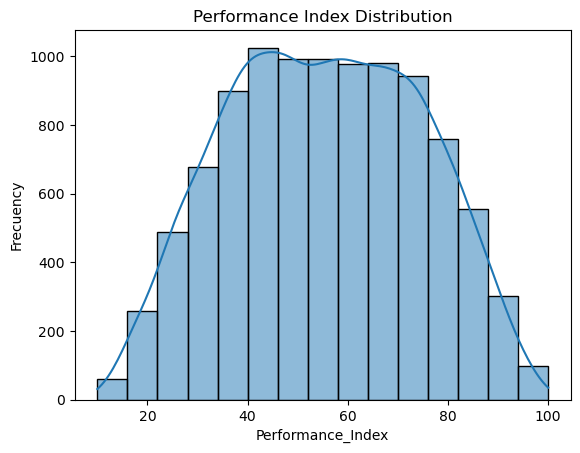

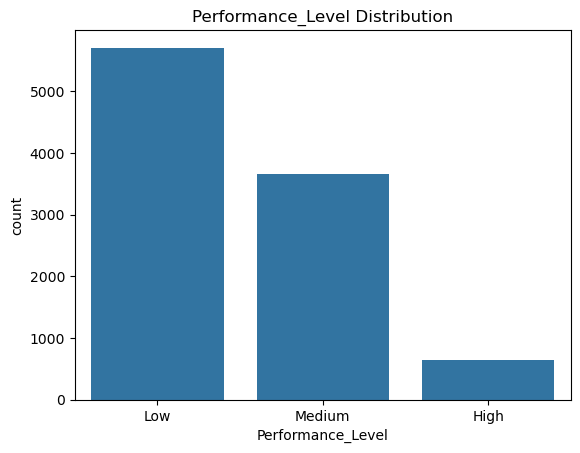

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Performance Index Histogram
sns.histplot(df['Performance_Index'], bins=15, kde=True)
plt.title('Performance Index Distribution')
plt.xlabel('Performance_Index')
plt.ylabel('Frecuency')
plt.show()

# Count by Performance_Level
sns.countplot(data=df, x='Performance_Level', order=['Low', 'Medium', 'High'])
plt.title('Performance_Level Distribution')
plt.show()

#### Correlation HeatMap

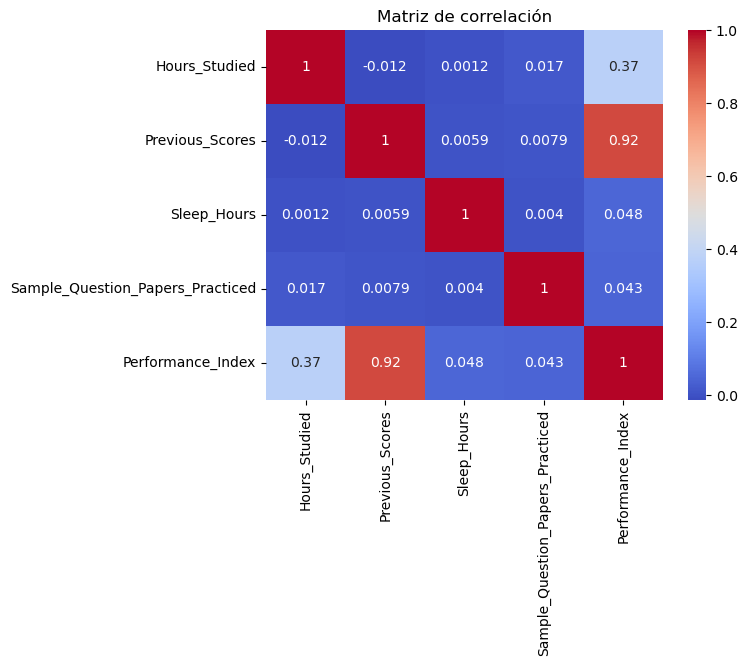

In [6]:
# Numeric Correlation
corr = df[['Hours_Studied', 'Previous_Scores', 'Sleep_Hours', 
           'Sample_Question_Papers_Practiced', 'Performance_Index']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

#### Study_Hours vs Performance_Index Relation

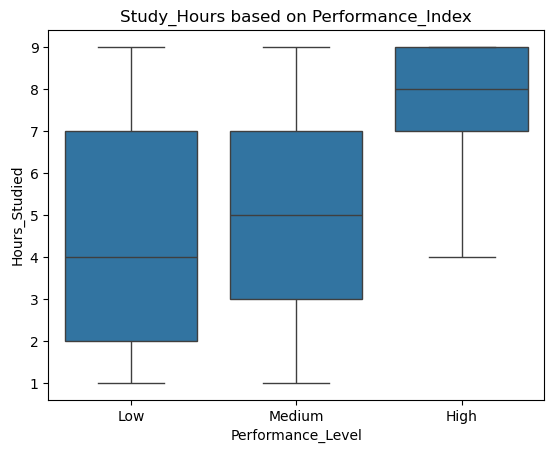

In [7]:
# Ex: Study_Hours based on Performance_Index
sns.boxplot(data=df, x='Performance_Level', y='Hours_Studied', order=['Low', 'Medium', 'High'])
plt.title('Study_Hours based on Performance_Index')
plt.show()

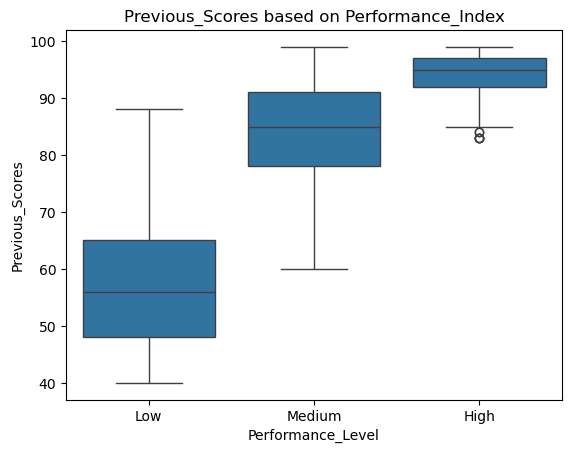

In [8]:
sns.boxplot(data=df, x='Performance_Level', y='Previous_Scores', order=['Low', 'Medium', 'High'])
plt.title('Previous_Scores based on Performance_Index')
plt.show()

## Regression Model

Small dataset, low noised relations, clear structure... lineal models could work great, but tree models (RF, GBoost...) are
suitable to detect interactions and no-linear relations... so we'll check metrics for the following regression models:

RandomForestRegressor

    Characteristics: Ensemble of trees → robust, reduces variance
    Suitability: Often performs well, even with some noise or outliers
    
LinearRegression

    Characteristics: Assumes a linear relationship between features and target
    Suitability: When variables are linearly correlated
    
Ridge/Lasso

    Characteristics: Same as Linear, but with regularization to avoid overfitting
    Suitability: When there are many features or multicollinearity
    
KNeighborsRegressor

    Characteristics: Predicts using average of nearest neighbors
    Suitability: Performs well with low-dimensional and well-clustered data, not scalable
    
DecisionTreeRegressor

    Characteristics: Splits data into rules (non-linear)
    Suitability: When there are clear thresholds and relationships
    
GradientBoostingRegressor

    Characteristics: Boosts weak learners iteratively, more refined than RF
    Suitability: May outperform RF if the data is clean and structured
    
SVR (Support Vector Regressor)

    Characteristics: Complex margin-based model, sensitive to feature scaling
    Suitability: Works well with small, well-scaled datasets, but slower

#### common initial code

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Features & target selection
X = df[['Hours_Studied', 'Previous_Scores', 'Sleep_Hours',
        'Sample_Question_Papers_Practiced', 'Extracurricular_Activities']]
y = df['Performance_Index']

# 2. Train/test division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale (optional for Random Forest, suitable for other models; to keep all variables with Avg=0 and std_dev=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Random Forest Regressor

In [10]:
from sklearn.ensemble import RandomForestRegressor

# 4. Model training
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 5. Prediction
y_pred_rf = rf_model.predict(X_test_scaled)

# 6. Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)  # error average in real units
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf)) # penalize big mistakes more
r2_rf = r2_score(y_test, y_pred_rf) # proportion of variance explained (ideally > 0.75 if there is a good relationship)

print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

MAE: 1.82
RMSE: 2.27
R² Score: 0.99


#### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

# 4. Model training
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 5. Prediction
y_pred_lr = lr_model.predict(X_test_scaled)

# 6. Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

MAE: 1.61
RMSE: 2.02
R² Score: 0.99


C:\Users\Eros\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Ridge Regression

In [12]:
from sklearn.linear_model import Ridge

# 4. Model training
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

# 5. Prediction
y_pred_ridge = ridge_model.predict(X_test_scaled)

# 6. Evaluation
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"MAE: {mae_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R² Score: {r2_ridge:.2f}")

MAE: 1.61
RMSE: 2.02
R² Score: 0.99


C:\Users\Eros\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### KNN Regressor

In [13]:
from sklearn.neighbors import KNeighborsRegressor

# 4. Model training
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

# 5. Prediction
y_pred_knn = knn_model.predict(X_test_scaled)

# 6. Evaluation
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"MAE: {mae_knn:.2f}")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R² Score: {r2_knn:.2f}")

MAE: 2.36
RMSE: 2.93
R² Score: 0.98


C:\Users\Eros\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Decision Tree Regresor

In [14]:
from sklearn.tree import DecisionTreeRegressor

# 4. Model training
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# 5. Prediction
y_pred_dt = dt_model.predict(X_test_scaled)

# 6. Evaluation
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"MAE: {mae_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}")

MAE: 2.34
RMSE: 2.96
R² Score: 0.98


C:\Users\Eros\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Gradient Boosting Regressor

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# 4. Model training
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# 5. Prediction
y_pred_gb = gb_model.predict(X_test_scaled)

# 6. Evaluation
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"MAE: {mae_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R² Score: {r2_gb:.2f}")

MAE: 1.66
RMSE: 2.09
R² Score: 0.99


C:\Users\Eros\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Compare All Metrics

In [16]:
df_metrics_regression = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'Ridge', 'KNN', 'Decision Tree', 'Gradient Boosting'],
    'MAE': [mae_rf, mae_lr, mae_ridge, mae_knn, mae_dt, mae_gb],
    'RMSE': [rmse_rf, rmse_lr, rmse_ridge, rmse_knn, rmse_dt, rmse_gb],
    'R² Score': [r2_rf, r2_lr, r2_ridge, r2_knn, r2_dt, r2_gb]
}).sort_values(by='R² Score', ascending=False).reset_index(drop=True)

df_metrics_regression

,Model,MAE,RMSE,R² Score
0,Linear Regression,1.611121,2.020552,0.988983
1,Ridge,1.611223,2.020696,0.988982
2,Gradient Boosting,1.657845,2.089171,0.988222
3,Random Forest,1.816076,2.274245,0.986043
4,KNN,2.360400,2.925932,0.976898
5,Decision Tree,2.335833,2.961747,0.976329


C:\Users\Eros\AppData\Local\Temp\ipykernel_17048\2284457376.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_regression, x='Model', y='R² Score', palette='viridis')


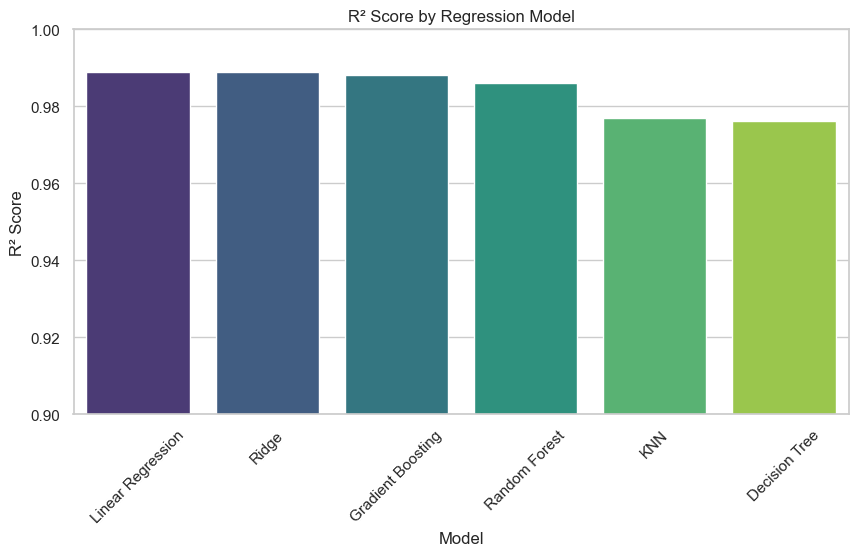

C:\Users\Eros\AppData\Local\Temp\ipykernel_17048\2284457376.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_regression, x='Model', y='MAE', palette='mako')


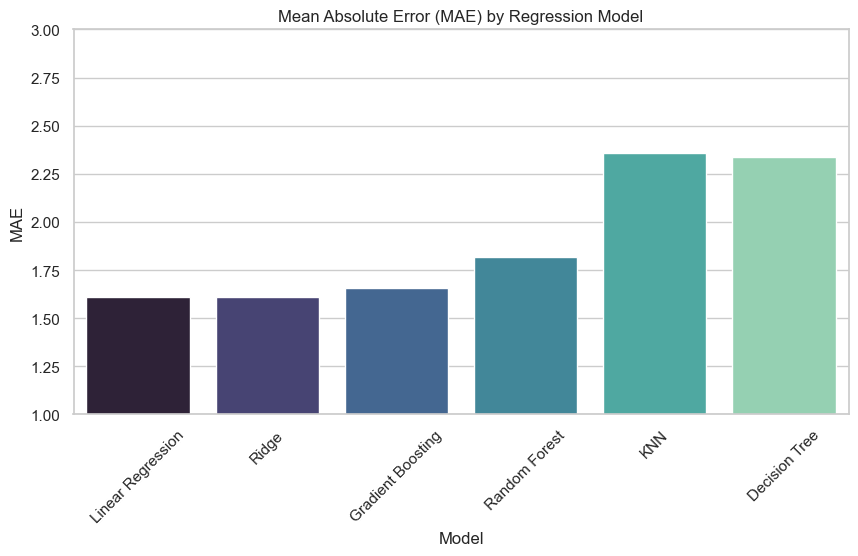

C:\Users\Eros\AppData\Local\Temp\ipykernel_17048\2284457376.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_regression, x='Model', y='RMSE', palette='rocket')


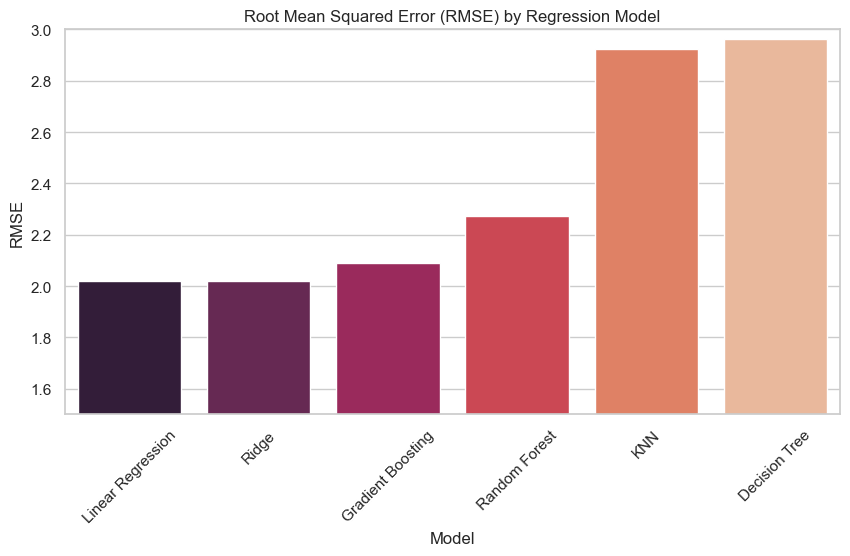

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Plot R² Score
plt.figure(figsize=(10, 5))
sns.barplot(data=df_metrics_regression, x='Model', y='R² Score', palette='viridis')
plt.title('R² Score by Regression Model')
plt.xticks(rotation=45)
plt.ylim(0.9, 1)
plt.show()

# Plot MAE
plt.figure(figsize=(10, 5))
sns.barplot(data=df_metrics_regression, x='Model', y='MAE', palette='mako')
plt.title('Mean Absolute Error (MAE) by Regression Model')
plt.xticks(rotation=45)
plt.ylim(1, 3)
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 5))
sns.barplot(data=df_metrics_regression, x='Model', y='RMSE', palette='rocket')
plt.title('Root Mean Squared Error (RMSE) by Regression Model')
plt.xticks(rotation=45)
plt.ylim(1.5, 3)
plt.show()

## Clasification Model

Feature Scaling is important for: KNN, SVC, Logistic Regression (optional but recommended)
Random Forest and Decision Tree are scale-invariant.
If the classes in Performance_Level are imbalanced, metrics like f1-score and confusion matrix are more informative than simple accuracy
So we'll check metrics for the following regression models:

Logistic Regression

    Characteristics: Simple, interpretable, works well with linear relationships
    Suitability: Baseline classifier, especially for binary or ordinal target variables
    
Random Forest

    Characteristics: Ensemble of decision trees, handles non-linear data, reduces overfitting
    Suitability: When interpretability is less important and accuracy is the main goal
    
K-Nearest Neighbors

    Characteristics: Lazy learner, simple to implement, no training phase, sensitive to feature scale
    Suitability: Small datasets, low dimensionality, when similarity-based logic makes sense
    
Decision Tree

    Characteristics: Easy to interpret, handles non-linearity, prone to overfitting
    Suitability: When interpretability is important and relationships are not strictly linear
    
Support Vector Machine (SVC)

    Characteristics: Powerful for high-dimensional spaces, can use kernel trick
    Suitability: When data is well-separated or with clear margins, not too large datasets

Metrics at Classification Models

Accuracy

    description: Ratio of correctly predicted instances over the total predictions
    interpretation: Overall correctness. Can be misleading with imbalanced classes
    
Precision

    description: TP / (TP + FP) — Proportion of positive predictions that are actually correct
    interpretation: High precision = few false positives
    
Recall

    description: TP / (TP + FN) — Proportion of actual positives that are correctly predicted
    interpretation: High recall = few false negatives (good coverage of actual positives)

F1-score

    description: Harmonic mean of precision and recall: 2 * (Precision * Recall) / (Precision + Recall)
    interpretation: Balances precision and recall. Good when class distribution is uneven

Support

    description: Number of true instances for each class in the dataset
    interpretation: Helps understand class distribution

Confusion Matrix

    description: Matrix showing actual vs. predicted classifications (TP, FP, TN, FN)
    interpretation: Useful to detect which classes are being confused with others
    
    Example of interpretation -> For a class labeled "High":

            True Positive (TP): Predicted High, actually High
            False Positive (FP): Predicted High, actually Low or Medium
            False Negative (FN): Predicted Low/Medium, actually High

#### common initial code

In [18]:
# other libraries/imports are run along previous Regression Analysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# 1. Features & target selection
X = df[['Hours_Studied', 'Previous_Scores', 'Sleep_Hours',
        'Sample_Question_Papers_Practiced', 'Extracurricular_Activities']]
y = df['Performance_Level']

# 2. Train/test division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale (optional for Random Forest, suitable for other models; to keep all variables with Avg=0 and std_dev=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Logistic Regression

Logistic Regression - Accuracy: 0.9625

Classification Report:
               precision    recall  f1-score   support

        High       0.93      0.84      0.88       126
         Low       0.98      0.98      0.98      1159
      Medium       0.94      0.96      0.95       715

    accuracy                           0.96      2000
   macro avg       0.95      0.93      0.94      2000
weighted avg       0.96      0.96      0.96      2000



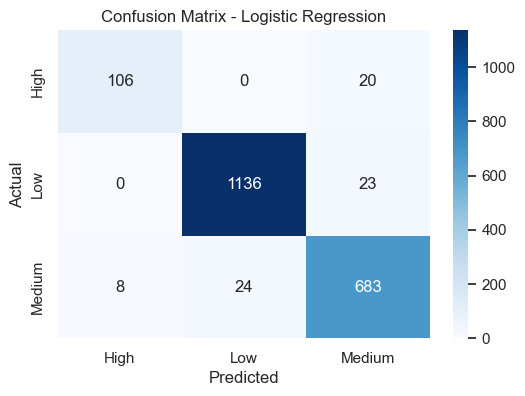

In [19]:
from sklearn.linear_model import LogisticRegression

# 4. Model training
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# 5. Prediction
y_pred_log = log_reg.predict(X_test_scaled)

# 6. Evaluation
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

# 7. Confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Random Forest

Random Forest - Accuracy: 0.9535

Classification Report:
               precision    recall  f1-score   support

        High       0.88      0.85      0.86       126
         Low       0.97      0.98      0.97      1159
      Medium       0.94      0.93      0.93       715

    accuracy                           0.95      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.95      0.95      0.95      2000



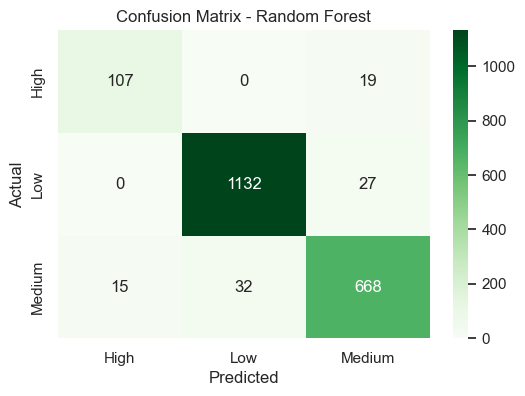

In [20]:
from sklearn.ensemble import RandomForestClassifier

# 4. Model training
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# 5. Prediction
y_pred_rf = rf_clf.predict(X_test_scaled)

# 6. Evaluation
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# 7. Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### K-Nearest Neighbors (KNN)

KNN - Accuracy: 0.936

Classification Report:
               precision    recall  f1-score   support

        High       0.88      0.72      0.79       126
         Low       0.97      0.96      0.96      1159
      Medium       0.89      0.93      0.91       715

    accuracy                           0.94      2000
   macro avg       0.92      0.87      0.89      2000
weighted avg       0.94      0.94      0.94      2000



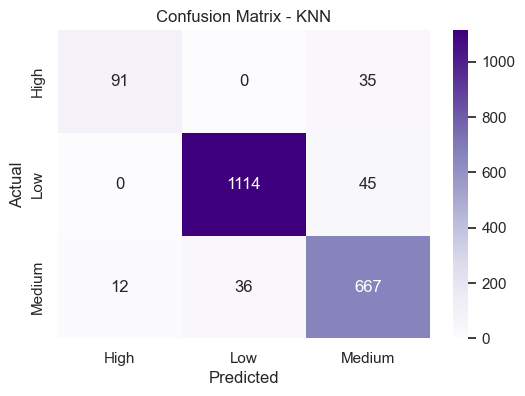

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# 4. Model training
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

# 5. Prediction
y_pred_knn = knn_clf.predict(X_test_scaled)

# 6. Evaluation
print("KNN - Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# 7. Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', xticklabels=knn_clf.classes_, yticklabels=knn_clf.classes_)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Decision Tree

Decision Tree - Accuracy: 0.943

Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.80      0.82       126
         Low       0.97      0.97      0.97      1159
      Medium       0.92      0.92      0.92       715

    accuracy                           0.94      2000
   macro avg       0.91      0.90      0.90      2000
weighted avg       0.94      0.94      0.94      2000



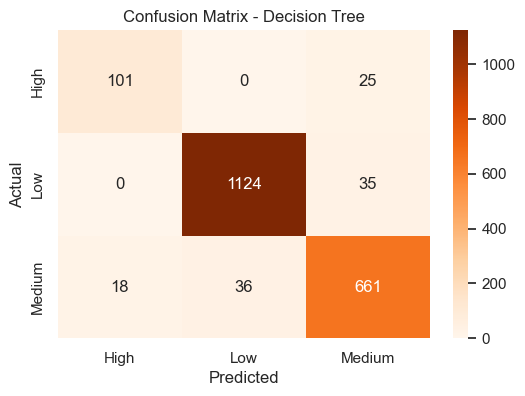

In [22]:
from sklearn.tree import DecisionTreeClassifier

# 4. Model training
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)

# 5. Prediction
y_pred_dt = dt_clf.predict(X_test_scaled)

# 6. Evaluation
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# 7. Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=dt_clf.classes_, yticklabels=dt_clf.classes_)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Support Vector Classifier (SVC)

SVC - Accuracy: 0.958

Classification Report:
               precision    recall  f1-score   support

        High       0.94      0.80      0.87       126
         Low       0.98      0.97      0.98      1159
      Medium       0.93      0.96      0.94       715

    accuracy                           0.96      2000
   macro avg       0.95      0.91      0.93      2000
weighted avg       0.96      0.96      0.96      2000



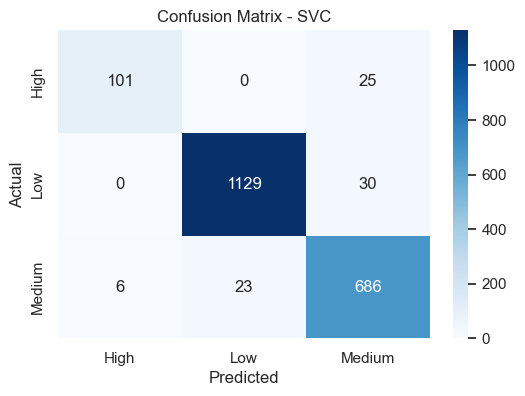

In [23]:
from sklearn.svm import SVC

# 4. Model training
svc_clf = SVC(kernel='rbf', random_state=42)
svc_clf.fit(X_train_scaled, y_train)

# 5. Prediction
y_pred_svc = svc_clf.predict(X_test_scaled)

# 6. Evaluation
print("SVC - Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))

# 7. Confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=svc_clf.classes_, yticklabels=svc_clf.classes_)
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Compare All Metrics

In [24]:
# Diccionary to store metrics
metrics_summary = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Models list and its predictions
models = {
    "Logistic Regression": y_pred_log,
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn,
    "Decision Tree": y_pred_dt,
    "SVC": y_pred_svc
}

# Calculate metrics for every model
for model_name, y_pred in models.items():
    metrics_summary["Model"].append(model_name)
    metrics_summary["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics_summary["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
    metrics_summary["Recall"].append(recall_score(y_test, y_pred, average='weighted'))
    metrics_summary["F1-Score"].append(f1_score(y_test, y_pred, average='weighted'))

# Create Dataframe with results
df_metrics_classification = pd.DataFrame(metrics_summary)

# Show table
display(df_metrics_classification)

# Export to CSV for later use in Power BI
#df_metrics_classification.to_csv("classification_metrics_summary.csv", index=False)


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.9625,0.962415,0.9625,0.962298
1,Random Forest,0.9535,0.953291,0.9535,0.953378
2,KNN,0.9360,0.936233,0.9360,0.935441
3,Decision Tree,0.9430,0.942736,0.9430,0.942820
4,SVC,0.9580,0.958362,0.9580,0.957703


C:\Users\Eros\AppData\Local\Temp\ipykernel_17048\3122866233.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_classification, x='Model', y='Accuracy', palette='viridis')


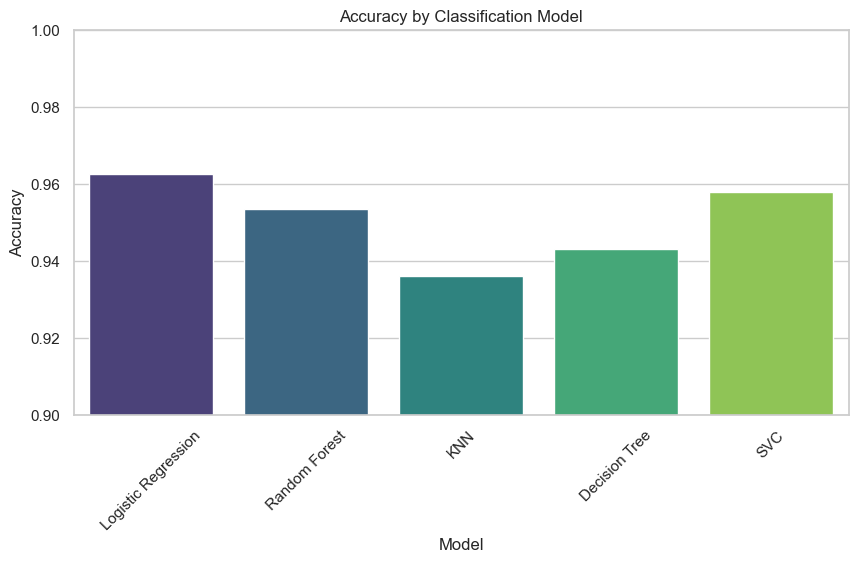

C:\Users\Eros\AppData\Local\Temp\ipykernel_17048\3122866233.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_classification, x='Model', y='Precision', palette='mako')


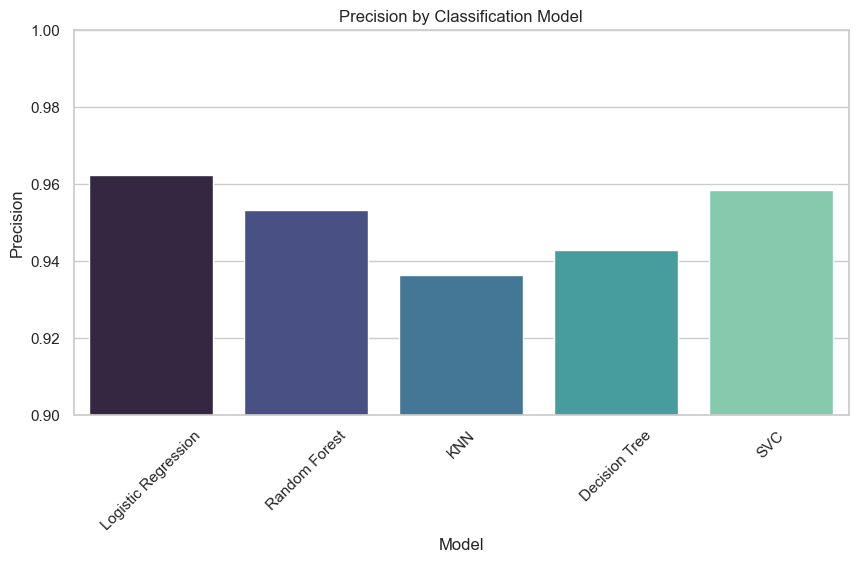

C:\Users\Eros\AppData\Local\Temp\ipykernel_17048\3122866233.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_classification, x='Model', y='Recall', palette='rocket')


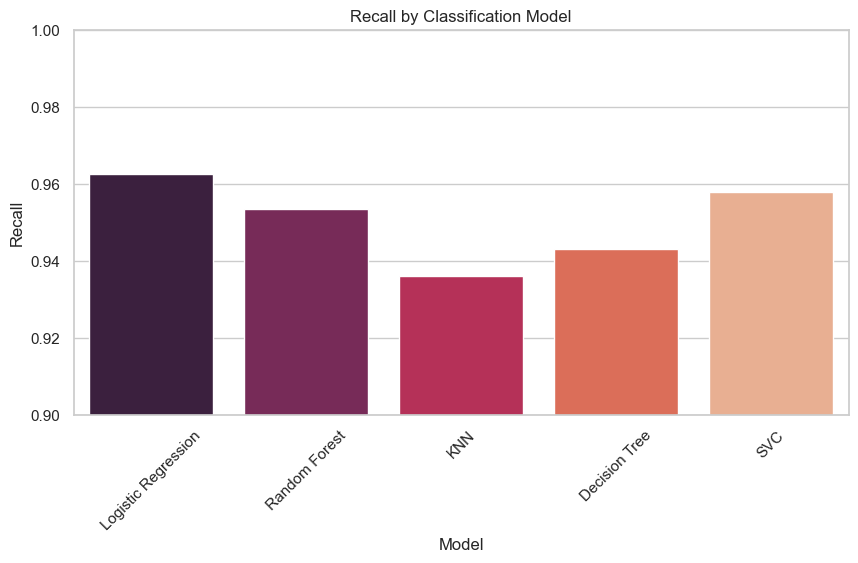

C:\Users\Eros\AppData\Local\Temp\ipykernel_17048\3122866233.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_metrics_classification, x='Model', y='F1-Score', palette='YlOrBr')


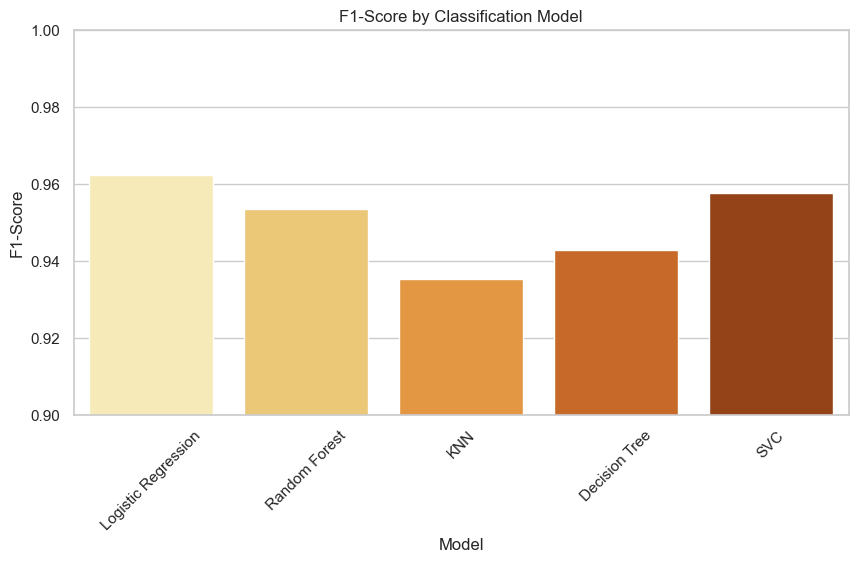

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Plot Accuracy
plt.figure(figsize=(10, 5))
sns.barplot(data=df_metrics_classification, x='Model', y='Accuracy', palette='viridis')
plt.title('Accuracy by Classification Model')
plt.xticks(rotation=45)
plt.ylim(0.9, 1)
plt.show()

# Plot Precision
plt.figure(figsize=(10, 5))
sns.barplot(data=df_metrics_classification, x='Model', y='Precision', palette='mako')
plt.title('Precision by Classification Model')
plt.xticks(rotation=45)
plt.ylim(0.9, 1)
plt.show()

# Plot Recall
plt.figure(figsize=(10, 5))
sns.barplot(data=df_metrics_classification, x='Model', y='Recall', palette='rocket')
plt.title('Recall by Classification Model')
plt.xticks(rotation=45)
plt.ylim(0.9, 1)
plt.show()

# Plot F1-Score
plt.figure(figsize=(10, 5))
sns.barplot(data=df_metrics_classification, x='Model', y='F1-Score', palette='YlOrBr')
plt.title('F1-Score by Classification Model')
plt.xticks(rotation=45)
plt.ylim(0.9, 1)
plt.show()

In [30]:
# y_test: real labels
# y_pred_log: logistic_regression model predictions
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred_log, labels=labels)
print(cm)

results = []
for i, label in enumerate(labels):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    
    results.append({
        'Class': label,
        'TP': TP,
        'FP': FP,
        'FN': FN,
        'TN': TN
    })

df_confusion_details = pd.DataFrame(results)
df_confusion_details

[[ 106    0   20]
 [   0 1136   23]
 [   8   24  683]]


,Class,TP,FP,FN,TN
0,High,106,8,20,1866
1,Low,1136,24,23,817
2,Medium,683,43,32,1242


## Export Metrics Tables to BBDD

In [27]:
from sqlalchemy import create_engine

# define engine to create connection to local ddbb
engine = create_engine('mssql+pyodbc://localhost\\SQLEXPRESS/Student_Performance?driver=ODBC+Driver+17+for+SQL+Server')

# save metrics dataframes
df_metrics_regression.to_sql('Regression_Metrics', con=engine, if_exists='replace', index=False)
df_metrics_classification.to_sql('Classification_Metrics', con=engine, if_exists='replace', index=False)
df_confusion_details.to_sql('Logistic_Regression__Confusion_Matrix', con=engine, if_exists='replace', index=False)

3